# Sphere rolling down a hill

In this notebook we will use the `ivp` function to solve the differential equation for a sphere rolling down a hill.

## Libraries

We will use the following libraries:

* `numpy` for numerical calculations
* `matplotlib` for plotting
* `scipy.integrate` for solving the differential equation
* `sympy` for symbolic calculations

In [3]:
%pip install numpy matplotlib scipy sympy --quiet
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import solve_ivp
import sympy as sym
sym.init_printing()

Note: you may need to restart the kernel to use updated packages.


## Physics

We will aproach this problem using the Lagrangian formalism. The Lagrangian is given by:
$$
\mathcal{L} = T - V
$$
where $T$ is the kinetic energy and $V$ is the potential energy. For this problem we have:

$$
T = \frac{1}{2}m\dot{x}^2 + \frac{1}{4}mR^2\dot{\theta}^2
$$

$$
V = mg(L-x)\sin\phi
$$

where $m$ is the mass of the sphere, $R$ is the radius of the sphere, $g$ is the gravitational acceleration, $x$ is the position of the sphere along the hill, $\theta$ is the angle between the $x$ axis and the normal to the hill, and $\phi$ is the angle between the $x$ axis and the tangent to the hill.




## Implementation

In [4]:
## Symbols

# Constants 
m, R, g, p, lo = sym.symbols('m R g \\phi L', positive=True, real=True, constant=True)

# Variables
t = sym.symbols('t', real=True)

# Functions
x = sym.Function('x', real=True)(t)
theta = sym.Function('\\theta', real=True)(t)

In [5]:
## Lagrangian

# Kinetic energy
T = sym.Rational(1,2)*m*(x.diff(t)**2) + sym.Rational(1,3)*m*((R)**2*theta.diff(t)**2)

# Potential energy
V = m*g*(lo-x)*sym.sin(p)

# Lagrangian
L = T - V
L

In [6]:
## Constraints
F = sym.Eq(x,  R*theta)
F

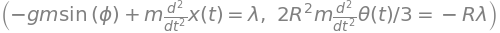

In [7]:
# Equations of motion
l = sym.Symbol('\\lambda', real=True)
LE1 = sym.Eq(sym.diff(sym.diff(L, x.diff(t)), t) - sym.diff(L, x), F.lhs.diff(x)*l)
LE2 = sym.Eq(sym.diff(sym.diff(L, theta.diff(t)), t) - sym.diff(L, theta), -F.rhs.diff(theta)*l)
LE1, LE2

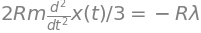

In [8]:
# Substitute constraint
LE2_ = LE2.subs(F.rhs.diff(t, 2)/R, F.lhs.diff(t,2)/R)
LE2_

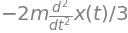

In [9]:
# Solve for lambda
l_ = sym.solve(LE2_, l)[0]
l_

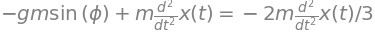

In [10]:
# Substitute lambda in LE1
LE1_ = LE1.subs(l, l_)
LE1_

In [11]:
# Solve LE1_ for x''(t)
xdd = sym.solve(LE1_, x.diff(t,2))[0]
xdd

In [12]:
# Substitute x''(t) in l_
l_ = l_.subs(x.diff(t,2), xdd)
l_

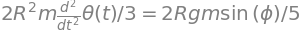

In [13]:
# Substitute l_ in LE2
LE2__ = LE2.subs(l, l_)
LE2__

In [14]:
# Solve LE2__ for theta''(t)
thetadd = sym.solve(LE2__, theta.diff(t,2))[0]
thetadd

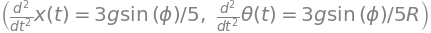

In [15]:
sym.Eq(x.diff(t,2), xdd), sym.Eq(theta.diff(t,2), thetadd)

In [16]:
xdd.atoms(sym.Symbol), thetadd.atoms(sym.Symbol)

## Solving analytically

In [17]:
# Solve differential equations
xdd_ = sym.dsolve(sym.Eq(x.diff(t,2), xdd), x)
thetadd_ = sym.dsolve(sym.Eq(theta.diff(t,2), thetadd), theta)
xdd_, thetadd_

In [18]:
# Get constants of integration
C1, C2 = sym.symbols('C1 C2', real=True)

# Substitute initial conditions x(0)=0, x'(0)=0
C1 = sym.Eq(xdd_.rhs.subs(t,0), 0)
C2 = sym.Eq(xdd_.rhs.diff(t).subs(t,0), 0)
C1,C2

In [19]:
# Substitute values of C1 and C2 in xdd_ and thetadd_
xdd_ = xdd_.subs(C1.lhs, C1.rhs).subs(C2.lhs, C2.rhs)
thetadd_ = thetadd_.subs(C1.lhs, C1.rhs).subs(C2.lhs, C2.rhs)
xdd_, thetadd_

In [20]:
# Get a plot of x(t) and theta(t)
time = np.linspace(0.1, 10, 100)

# Substitute values of m, R, g, p
xdd_n = xdd_.rhs.subs({m:1, R:1, g:9.8, p:np.pi/4})
thetadd_n = thetadd_.rhs.subs({m:1, R:2, g:9.8, p:np.pi/4})
xdd_n, thetadd_n

In [21]:
x_n = sym.lambdify(t, xdd_n)
theta_n = sym.lambdify(t, thetadd_n)

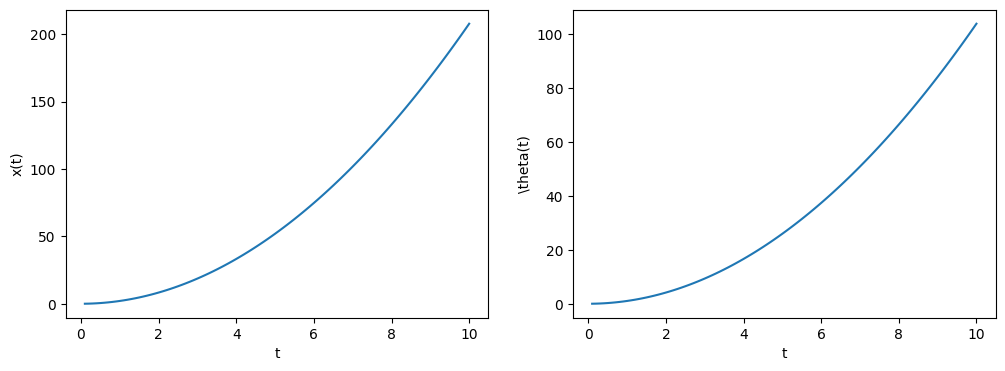

In [22]:
# Plot x(t) and theta(t)
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(time, x_n(time))
ax[0].set_xlabel('t')
ax[0].set_ylabel('x(t)')
ax[1].plot(time, theta_n(time))
ax[1].set_xlabel('t')
ax[1].set_ylabel('\\theta(t)')
plt.show()

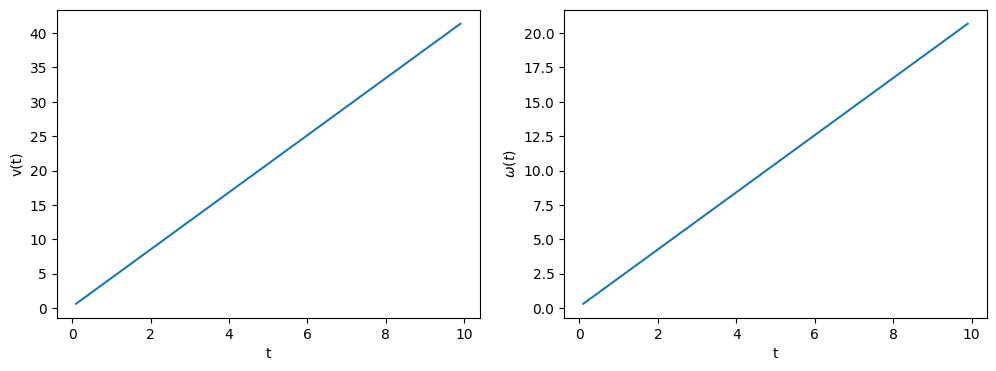

In [23]:
# Plot x'(t) and theta'(t)
fig, ax = plt.subplots(1,2, figsize=(12,4))
v = np.diff(x_n(time))/np.diff(time)
# |v|
v = np.sqrt(v**2)
w = np.diff(theta_n(time))/np.diff(time)
# |w|
w = np.sqrt(w**2)
ax[0].plot(time[:-1], v)
ax[0].set_xlabel('t')
ax[0].set_ylabel('v(t)')
ax[1].plot(time[:-1], w)
ax[1].set_xlabel('t')
ax[1].set_ylabel('$\\omega(t)$')
plt.show()

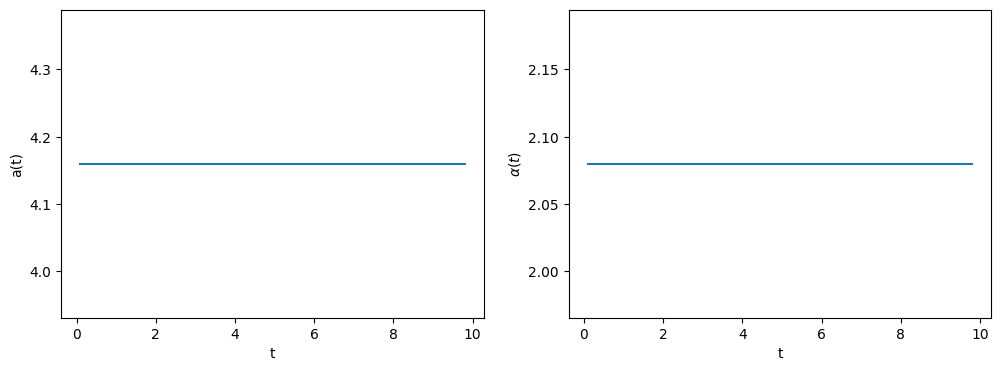

In [24]:
# Plot x''(t) and theta''(t)
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Round to 2 decimal places
a = np.diff(v)/np.diff(time[:-1])
a = np.round(a, 2)
b = np.diff(w)/np.diff(time[:-1])
b = np.round(b, 2)
ax[0].plot(time[:-2], a)
ax[0].set_xlabel('t')
ax[0].set_ylabel('a(t)')
ax[1].plot(time[:-2], b)
ax[1].set_xlabel('t')
ax[1].set_ylabel('$\\alpha(t)$')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


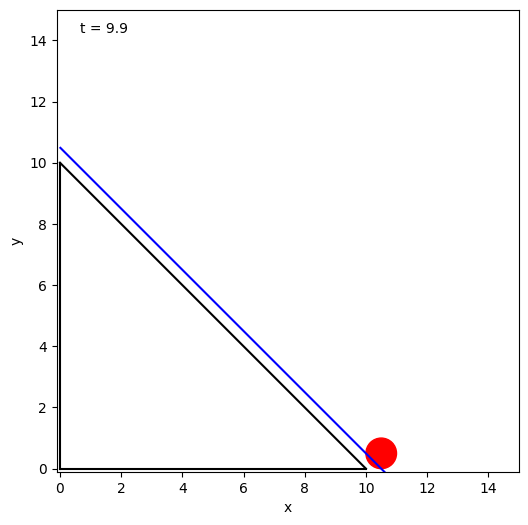

In [39]:
# Create an animation
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_xlim(-0.1, 15)
ax.set_ylim(-0.1, 15)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Plot hill
left_line = ax.plot([0, 0], [0, 10], color='k')[0]
hill_line = ax.plot([0, 10], [10, 0], color='k')[0]
ground_line = ax.plot([0, 10], [0, 0], color='k')[0]

# Plot sphere
sphere = plt.Circle((0, 10.5), 0.5, color='r')
ax.add_artist(sphere)

# Plot trajectory
trajectory, = ax.plot([], [], color='b')

# Plot time
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes)

# Trajectory function
def pos(t):
    x = x_n(t) * np.cos(np.pi/4)
    y = 10.5 - (x_n(t) * np.sin(np.pi/4))
    return x, y

# Animation function
def animate(i):
    t = 0.1*i
    x, y = pos(t)
    sphere.center = (x, y)
    trajectory.set_data(*pos(time[:i]))
    time_text.set_text('t = %.1f' % t)
    if y <= 0 :
        y = 0.5
        x = 10.5
        sphere.center = (x, y)
        trajectory.set_data(*pos(time[:i]))
        time_text.set_text('t = %.1f' % t)
        return sphere, trajectory, time_text
    return sphere, trajectory, time_text
    

# Create animation at 5 fps
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

# Save animation
anim.save('rolling_sphere.gif',fps=30)

## Solving numerically

In [26]:
# Lambda function for x(t) and theta(t)
xdd_f = sym.lambdify((t, m, R, g, p, x.diff(t), theta.diff(t)), xdd)
thetadd_f = sym.lambdify((t, m, R, g, p, x.diff(t), theta.diff(t)), thetadd)

In [27]:
# Test function
xdd_f(0, 1, 2/3, 1, np.pi/2, 0, 0)

In [28]:
# Test function
thetadd_f(0, 1, 2/3, 1, np.pi/2, 0, 0)

In [29]:
# Solve ODE
def solve_ode(t, y, m, R, g, p):
    x, theta, xdot, thetadot = y
    xddot = xdd_f(t, m, R, g, p, xdot, thetadot)
    thetaddot = thetadd_f(t, m, R, g, p, xdot, thetadot)
    return [xdot, thetadot, xddot, thetaddot]

In [30]:
# Time
t = np.linspace(0, 10, 100)

# Initial conditions
y0 = [0, 0, 0, 0]

# Parameters
m = 1
R = 1
g = 9.8
p = np.pi/4

# Solve ODE
sol = solve_ivp(solve_ode, (0, 10), y0, args=(m, R, g, p), t_eval=t, method='RK45', rtol=1e-6, atol=1e-6)
sol = sol.y

In [31]:
# Get x, x'' and theta, theta''
x = sol[0]
xdd = sol[2]
theta = sol[1]
thetadd = sol[3]

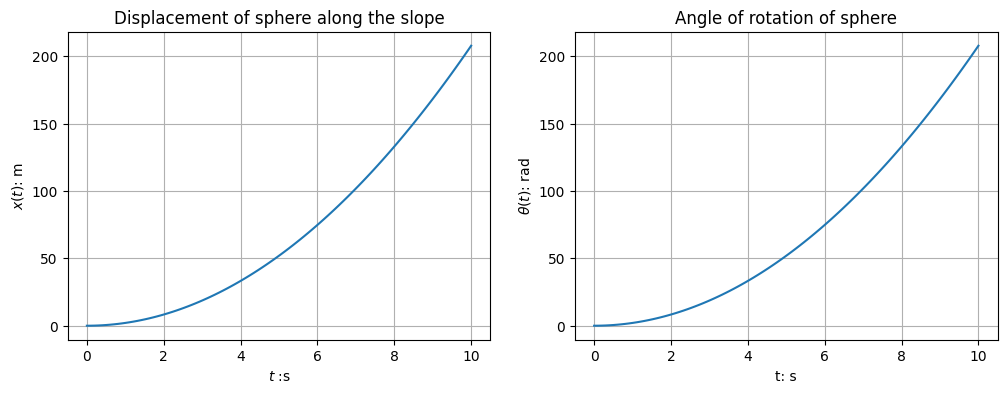

In [32]:
# Plot x(t) and theta(t)
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(t, x)
ax[0].set_xlabel('$t$ :s')
ax[0].set_ylabel('$x(t)$: m')
ax[0].set_title('Displacement of sphere along the slope')
ax[0].grid()
ax[1].plot(t, theta)
ax[1].set_xlabel('t: s')
ax[1].set_ylabel('$\\theta(t)$: rad')
ax[1].set_title('Angle of rotation of sphere')
ax[1].grid()
plt.show()

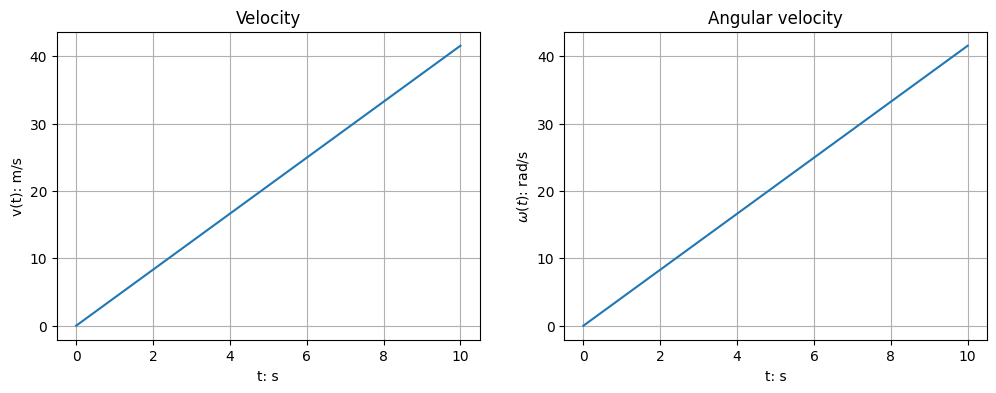

In [33]:
# Plot x'(t) and theta'(t)
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(t, xdd)
ax[0].set_xlabel('t: s')
ax[0].set_ylabel('v(t): m/s')
ax[0].set_title('Velocity')
ax[0].grid()
ax[1].plot(t, thetadd)
ax[1].set_xlabel('t: s')
ax[1].set_ylabel('$\\omega(t)$: rad/s')
ax[1].set_title('Angular velocity')
ax[1].grid()
plt.show()

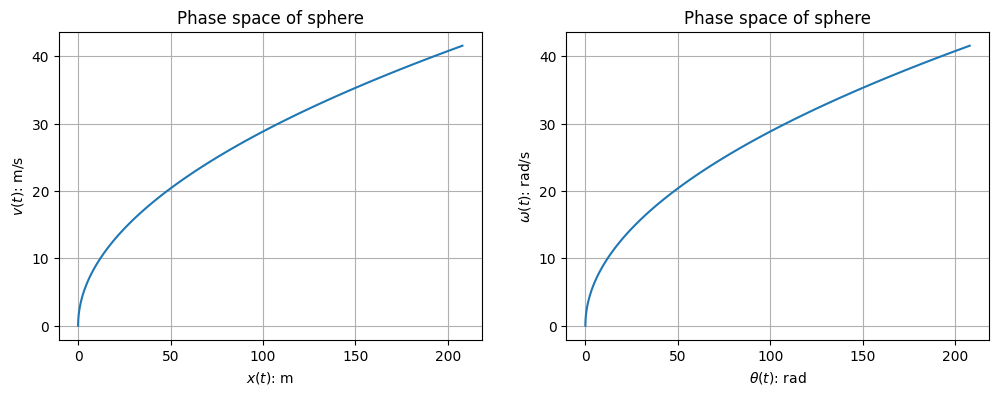

In [34]:
# Plot phase space
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(x, xdd)
ax[0].set_xlabel('$x(t)$: m')
ax[0].set_ylabel('$v(t)$: m/s')
ax[0].set_title('Phase space of sphere')
ax[0].grid()
ax[1].plot(theta, thetadd)
ax[1].set_xlabel('$\\theta(t)$: rad')
ax[1].set_ylabel('$\\omega(t)$: rad/s')
ax[1].set_title('Phase space of sphere')
ax[1].grid()
plt.show()